In [1]:
%matplotlib inline
from __future__ import division,print_function
import os, json
from glob import glob
import numpy as np
import scipy
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
import shutil
import utils; reload(utils)
from utils import plots, get_batches, plot_confusion_matrix, get_data,load_array, save_array, split_at, copy_weights

Using TensorFlow backend.


In [2]:
from numpy.random import random, permutation
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom

import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential
from keras.layers import Input
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.layers.normalization import BatchNormalization

import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [3]:
import os,sys
LESSON_HOME_DIR = os.getcwd()
DATA_HOME_DIR = os.getcwd() + '/data'
print (LESSON_HOME_DIR , DATA_HOME_DIR)

/Users/IshaanSahil/AnacondaProjects /Users/IshaanSahil/AnacondaProjects/data


In [4]:
%cd $DATA_HOME_DIR/redux
#%mkdir -p sample/train
#%mkdir -p sample/valid
#%mkdir -p sample/test
#%mkdir -p sample/results

/Users/IshaanSahil/AnacondaProjects/data/redux


In [16]:
#%mkdir train
#%mkdir test
#%mkdir valid

In [5]:
#%cd $DATA_HOME_DIR/redux/train
#g =glob('*.jpg')
#shuf = np.random.permutation(g)
#for i in range(2000): shutil.move(shuf[i], DATA_HOME_DIR+'/redux/valid/' + shuf[i])

/Users/IshaanSahil/AnacondaProjects/data/redux/train


Error: `dog.561.jpg` and `/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.561.jpg` are the same file

In [24]:
#%cd $DATA_HOME_DIR/redux/train
#%mkdir cats
#%mkdir dogs
#%mv cat.*.jpg cats
#%mv dog.*.jpg dogs

/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.0.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.1.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.10.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.100.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.1000.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.10000.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.10001.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.10002.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.10003.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.10004.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.10005.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.10006.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.10007.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.10008.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.10009.jpg
/Users/Is

/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.1175.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.11750.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.11751.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.11752.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.11753.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.11754.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.11755.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.11756.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.11757.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.11758.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.11759.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.1176.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.11760.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.11761.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.11762.j

/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.3132.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.3133.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.3134.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.3135.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.3136.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.3137.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.3138.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.3139.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.314.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.3140.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.3141.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.3142.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.3143.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.3144.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.3145.jpg
/Users/Isha

/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.5806.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.5807.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.5808.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.5809.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.581.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.5810.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.5811.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.5812.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.5813.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.5814.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.5815.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.5816.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.5817.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.5818.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.5819.jpg
/Users/Isha

/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.8257.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.8258.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.8259.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.826.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.8260.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.8261.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.8262.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.8263.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.8264.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.8265.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.8266.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.8267.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.8268.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.8269.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/cat.827.jpg
/Users/Ishaa

/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.10801.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.10802.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.10803.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.10804.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.10805.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.10806.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.10807.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.10808.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.10809.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.1081.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.10810.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.10811.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.10812.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.10813.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.10814.

/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.2195.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.2196.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.2197.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.2198.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.2199.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.22.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.220.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.2200.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.2201.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.2202.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.2203.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.2204.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.2205.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.2206.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.2207.jpg
/Users/Ishaan

/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.4800.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.4801.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.4802.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.4803.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.4804.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.4805.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.4806.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.4807.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.4808.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.4809.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.481.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.4810.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.4811.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.4812.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.4813.jpg
/Users/Isha

/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.722.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.7220.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.7221.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.7222.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.7223.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.7224.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.7225.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.7226.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.7227.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.7228.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.7229.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.723.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.7230.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.7231.jpg
/Users/IshaanSahil/AnacondaProjects/data/redux/train/dog.7232.jpg
/Users/Ishaa

In [6]:
#%cd $DATA_HOME_DIR/redux/valid
#%mkdir cats
#%mkdir dogs
#%mv cat.*.jpg cats/
#%mv dog.*.jpg dogs/

/Users/IshaanSahil/AnacondaProjects/data/redux/train
/bin/sh: /bin/mv: Argument list too long
/bin/sh: /bin/mv: Argument list too long
/Users/IshaanSahil/AnacondaProjects/data/redux/valid
mv: rename cat.*.jpg to cats/cat.*.jpg: No such file or directory
mv: rename dog.*.jpg to dogs/dog.*.jpg: No such file or directory


In [4]:
train_path = DATA_HOME_DIR + '/redux/train/'
valid_path = DATA_HOME_DIR + '/redux/valid/'
test_path = DATA_HOME_DIR + '/redux/test/'
results_path = DATA_HOME_DIR + '/redux/results/'
models_path = DATA_HOME_DIR + '/redux/models/'
print(train_path, valid_path, test_path, results_path, models_path)

/Users/IshaanSahil/AnacondaProjects/data/redux/train/ /Users/IshaanSahil/AnacondaProjects/data/redux/valid/ /Users/IshaanSahil/AnacondaProjects/data/redux/test/ /Users/IshaanSahil/AnacondaProjects/data/redux/results/ /Users/IshaanSahil/AnacondaProjects/data/redux/models/


In [5]:
vgg = Vgg16()
batch_size=4
no_of_epochs = 25
train_batches = vgg.get_batches(train_path, batch_size=batch_size)
valid_batches = vgg.get_batches(valid_path, batch_size=batch_size*2)
vgg.finetune(train_batches)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [6]:
vgg.model.optimizer.lr =0.001
latest_weights_filename = None
for epoch in range(no_of_epochs):
    print ("Running epoch: %d" % epoch)
    vgg.fit(train_batches, valid_batches, nb_epoch=1)
    latest_weights_filename = 'ft%d.h5' % epoch
    vgg.model.save_weights(results_path + latest_weights_filename)

Running epoch: 0
Epoch 1/1
  684/23000 [..............................] - ETA: 22321s - loss: 0.7966 - acc: 0.7851

KeyboardInterrupt: 

In [6]:
vgg.model.load_weights(results_path + 'ft17.h5')

In [8]:
print(test_path)
batches, preds = vgg.test(test_path, batch_size=batch_size*2)

/Users/IshaanSahil/AnacondaProjects/data/redux/sample/test/
Found 100 images belonging to 1 classes.


In [12]:
print(preds.shape, preds[:5])

(100, 2) [[  1.6815e-05   9.9998e-01]
 [  9.9998e-01   1.6495e-05]
 [  9.9996e-01   3.7634e-05]
 [  1.0000e+00   4.3238e-08]
 [  5.0407e-11   1.0000e+00]]


In [29]:
print(batches.filenames[:5])
filenames = batches.filenames

['unknown/1.jpg', 'unknown/10.jpg', 'unknown/100.jpg', 'unknown/11.jpg', 'unknown/12.jpg']


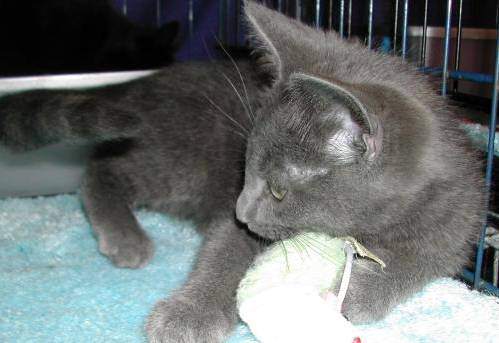

In [30]:
from PIL import Image
Image.open(test_path + filenames[2])

In [32]:
from utils import save_array
save_array(results_path + 'test_preds.dat', preds)
save_array(results_path + 'filenames.dat', filenames)

In [33]:
v_batches, probs = vgg.test(valid_path, batch_size = batch_size)

Found 100 images belonging to 2 classes.


In [34]:
vfilenames = v_batches.filenames
expected_labels = v_batches.classes
our_predictions = probs[:,0]
our_labels = np.round(1-our_predictions)

In [35]:
from keras.preprocessing import image

def plots_idx(idx, titles=None):
    plots([image.load_img(valid_path + vfilenames[i]) for i in idx], titles=titles)

n_view=4

Found 91 correct labels


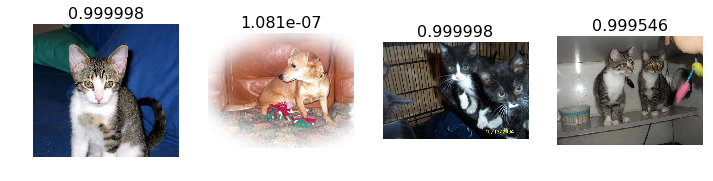

In [41]:
#1. A few correct labels at random
correct = np.where(our_labels == expected_labels)[0]
print ("Found %d correct labels" % len(correct))
idx = permutation(correct)[:n_view]
plots_idx(idx, our_predictions[idx])

In [43]:
#2: A few incorrect labels at random
incorrect = np.where(our_labels!=expected_labels)[0]
print("Foind %d incorrect labels" % len(incorrect))
idx = permutation(incorrect)[:n_view]
plots_idx(idx, our_predictions[idx])

Foind 9 incorrect labels


In [47]:
probs[0]

array([  9.9999e-01,   5.2326e-06], dtype=float32)

Found 39 confident correct cat labels


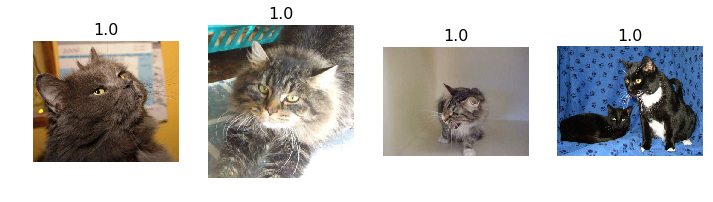

In [50]:
#3a: The images we most confident were cats, and are actually cats
correct_cats = np.where((our_labels==0)&(our_labels==expected_labels))[0]
print("Found %d confident correct cat labels" % len(correct_cats))
most_correct_cats=np.argsort(our_predictions[correct_cats])[::-1][:n_view]
plots_idx(correct_cats[most_correct_cats], our_predictions[correct_cats][most_correct_cats])

In [53]:
#3b. The images we most confident were dogs, and are actually digs
correct_dogs = np.where((our_labels==1)& (our_labels==expected_labels))[0]
print("Found %d confident correct dog labels" % len(correct_dogs))
most_correct_dogs = np.argsort(our_predictions[correct_dogs])[:n_view]
plots_idx(correct_dogs[most_correct_dogs], our_predictions[correct_dogs][most_correct_dogs])

Found 52 confident correct dog labels


In [55]:
#4a. The images we were most confident were cats, but are actually dogs
incorrect_cats = np.where((our_labels==0) & (our_labels!=expected_labels))[0]
print("Found %d incorrect cats" % len(incorrect_cats))
if len(incorrect_cats):
    most_incorrect_cats = np.argsort(our_predictions[incorrect_cats])[::-1][:n_view]
    plots_idx(incorrect_cats[most_incorrect_cats], our_predictions[incorrect_cats][most_incorrect_cats])

Found 3 incorrect cats


Found 6 incorrect dogs


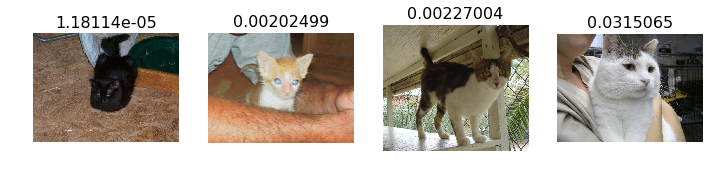

In [57]:
#4b. The images we most confident were dogs, but are actually cats
incorrect_dogs = np.where((our_labels==1) & (our_labels!=expected_labels))[0]
print("Found %d incorrect dogs" % len(incorrect_dogs))
if len(incorrect_dogs):
    most_incorrect_dogs  = np.argsort(our_predictions[incorrect_dogs])[:n_view]
    plots_idx(incorrect_dogs[most_incorrect_dogs], our_predictions[incorrect_dogs][most_incorrect_dogs])

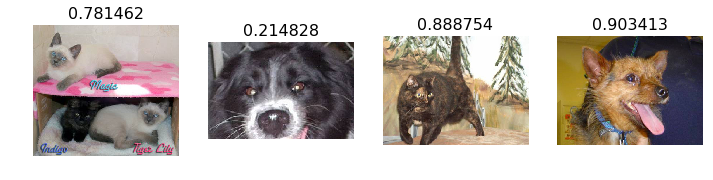

In [58]:
#5 the most uncertain labels (ie those with probability closest to 0.5)
most_uncertain = np.argsort(np.abs(our_predictions-0.5))
plots_idx(most_uncertain[:n_view], our_predictions[most_uncertain])

In [59]:
from sklearn.metrics import confusion_matrix
cm =  confusion_matrix(expected_labels, our_labels)

In [60]:
plot_confusion_matrix(cm, v_batches.class_indices)

[[39  6]
 [ 3 52]]


In [7]:
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [8]:
layers = vgg.model.layers
last_conv_idx = [index for index,layer in enumerate(layers)
                    if type(layer) is Convolution2D][-1]
last_conv_idx

30

In [9]:
conv_layers = layers[:last_conv_idx+1]
conv_model = Sequential(conv_layers)
fc_layers = layers[last_conv_idx + 1:]

In [10]:
def onehot(x): return np.array(OneHotEncoder().fit_transform(x.reshape(-1,1)).todense())

In [11]:
train_batches = get_batches(train_path, shuffle=False, batch_size=batch_size)
valid_batches = get_batches(valid_path, shuffle=False, batch_size=batch_size)

train_classes = train_batches.classes
valid_classes = valid_batches.classes
train_labels = onehot(train_classes)
valid_labels = onehot(valid_classes)

Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [12]:
train_batches.class_indices

{'cats': 0, 'dogs': 1}

In [13]:
train_features = conv_model.predict_generator(train_batches, train_batches.nb_sample)
valid_features = conv_model.predict_generator(valid_batches, valid_batches.nb_sample)

KeyboardInterrupt: 

In [87]:
save_array(models_path + 'train_convlayer_features.bc', train_features)
save_array(models_path + 'valid_convlayer_features.bc', valid_features)

In [14]:
train_features = load_array(models_path + 'train_convlayer_features.bc')
valid_features = load_array(models_path + 'valid_convlayer_features.bc')

In [15]:
train_features.shape

(200, 512, 14, 14)

In [16]:
def proc_weights(layer):
    return [o/2 for o in layer.get_weights()]

In [17]:
opt = Adam(lr=0.0000001)

In [18]:
def get_fc_model():
    model = Sequential([
        MaxPooling2D(input_shape=conv_layers[-1].output_shape[1:]),
        Flatten(),
        Dense(4096,activation='relu'),
        Dropout(0.),
        Dense(4096,activation='relu'),
        Dropout(0.),
        Dense(2,activation='softmax')
    ])
    
    for l1, l2 in zip(model.layers, fc_layers): l1.set_weights(proc_weights(l2))
    
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [19]:
fc_model = get_fc_model()

In [23]:
fc_model.fit(train_features, train_labels, nb_epoch=25, 
                       batch_size=batch_size, validation_data=(valid_features, valid_labels))
fc_model.save_weights(models_path + 'no_dropout.h5')

Train on 200 samples, validate on 100 samples
Epoch 1/25
200/200 [==============================] - 136s - loss: 1.0506 - acc: 0.6000 - val_loss: 0.9351 - val_acc: 0.6600
Epoch 2/25
200/200 [==============================] - 120s - loss: 1.0025 - acc: 0.6000 - val_loss: 0.9299 - val_acc: 0.6500
Epoch 3/25
200/200 [==============================] - 117s - loss: 0.9578 - acc: 0.6000 - val_loss: 0.9268 - val_acc: 0.6500
Epoch 4/25
200/200 [==============================] - 111s - loss: 0.9148 - acc: 0.6000 - val_loss: 0.9235 - val_acc: 0.6500
Epoch 5/25
200/200 [==============================] - 116s - loss: 0.8738 - acc: 0.6000 - val_loss: 0.9203 - val_acc: 0.6500
Epoch 6/25
200/200 [==============================] - 105s - loss: 0.8350 - acc: 0.6000 - val_loss: 0.9182 - val_acc: 0.6500
Epoch 7/25
200/200 [==============================] - 97s - loss: 0.7962 - acc: 0.6000 - val_loss: 0.9192 - val_acc: 0.6500
Epoch 8/25
200/200 [==============================] - 104s - loss: 0.7619 - acc:

In [20]:
fc_model.load_weights(models_path + 'no_dropout.h5')

In [22]:
gen = image.ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1,
                              shear_range=0.15, zoom_range=0.1, channel_shift_range=10.,
                              horizontal_flip=True, dim_ordering='tf')

In [24]:
img = np.expand_dims(ndimage.imread(test_path + 'unknown/7.jpg'),0)
aug_iter = gen.flow(img)
aug_imgs = [next(aug_iter)[0].astype(np.uint8) for i in range(8)]
plt.imshow(img[0])

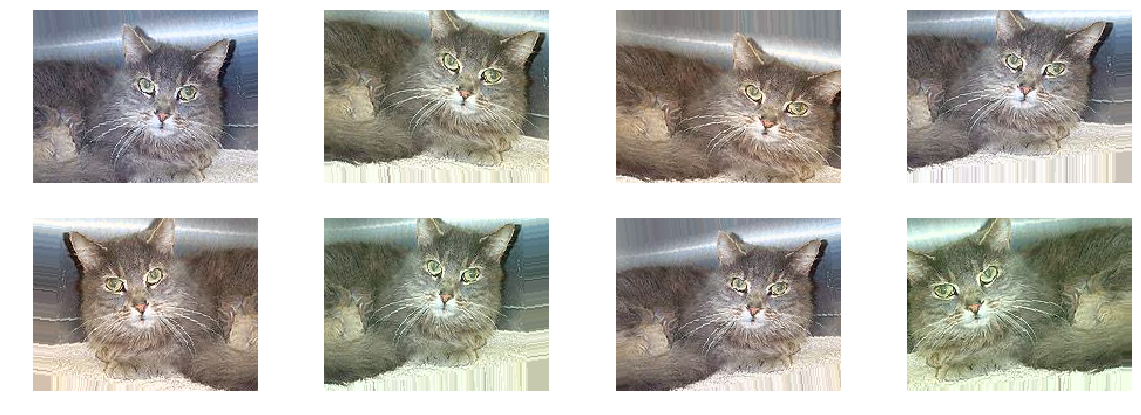

In [25]:
plots(aug_imgs, (20,7),2)

In [26]:
K.set_image_dim_ordering('th')

In [27]:
gen = image.ImageDataGenerator(rotation_range=15, width_shift_range=0.1,
                              height_shift_range=0.1, zoom_range=0.1, horizontal_flip=True)

In [28]:
train_batches = get_batches(train_path, gen, batch_size=batch_size)
valid_batches = get_batches(valid_path, shuffle=False, batch_size=batch_size)

Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [29]:
fc_model = get_fc_model()

In [30]:
for layer in conv_model.layers: layer.trainable = False
conv_model.add(fc_model)

In [31]:
conv_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
conv_model.fit_generator(train_batches, samples_per_epoch=train_batches.nb_sample, nb_epoch=8,
                        validation_data=valid_batches, nb_val_samples=valid_batches.nb_sample)

Epoch 1/8
200/200 [==============================] - 421s - loss: 0.2520 - acc: 0.9450 - val_loss: 0.2222 - val_acc: 0.9100
Epoch 2/8
200/200 [==============================] - 414s - loss: 0.2074 - acc: 0.9800 - val_loss: 0.2193 - val_acc: 0.9100
Epoch 3/8
200/200 [==============================] - 389s - loss: 0.2127 - acc: 0.9650 - val_loss: 0.2154 - val_acc: 0.9100
Epoch 4/8
200/200 [==============================] - 386s - loss: 0.1865 - acc: 0.9850 - val_loss: 0.2114 - val_acc: 0.9100
Epoch 5/8
200/200 [==============================] - 387s - loss: 0.2197 - acc: 0.9650 - val_loss: 0.2085 - val_acc: 0.9100
Epoch 6/8
200/200 [==============================] - 389s - loss: 0.2055 - acc: 0.9750 - val_loss: 0.2065 - val_acc: 0.9100
Epoch 7/8
200/200 [==============================] - 386s - loss: 0.1743 - acc: 0.9800 - val_loss: 0.2028 - val_acc: 0.9100
Epoch 8/8
200/200 [==============================] - 384s - loss: 0.1654 - acc: 0.9950 - val_loss: 0.2001 - val_acc: 0.9100


In [34]:
conv_model.fit_generator(train_batches, samples_per_epoch=train_batches.nb_sample, nb_epoch=3,
                        validation_data=valid_batches, nb_val_samples=valid_batches.nb_sample)

Epoch 1/3
200/200 [==============================] - 416s - loss: 0.1921 - acc: 0.9550 - val_loss: 0.1979 - val_acc: 0.9100
Epoch 2/3
200/200 [==============================] - 393s - loss: 0.1820 - acc: 0.9700 - val_loss: 0.1960 - val_acc: 0.9100
Epoch 3/3
200/200 [==============================] - 382s - loss: 0.1653 - acc: 0.9800 - val_loss: 0.1932 - val_acc: 0.9100


In [36]:
conv_model.save_weights(models_path + 'augemntweights.h5')

In [37]:
conv_layers[-1].output_shape[1:]

(512, 14, 14)

In [72]:
from vgg16bn import Vgg16BN
vgg16_bn = Vgg16BN()
def get_bn_layers(p):
    return [
        MaxPooling2D(input_shape=conv_layers[-1].output_shape[1:]),
        Flatten(),
        Dense(4096, activation='relu'),
        BatchNormalization(),
        Dropout(p),
        Dense(4096, activation='relu'),
        BatchNormalization(),
        Dropout(p),
        Dense(1000, activation='softmax')
    ]

In [75]:
def load_fc_weights_from_vgg16bn(model):        
    _, fc_layers = split_at(vgg16_bn.model, Convolution2D)
    copy_weights(fc_layers, model.layers)

In [74]:
p = 0.6
bn_model = Sequential(get_bn_layers(p))
load_fc_weights_from_vgg16bn(bn_model)

In [76]:
def proc_weights(layer, prev_p, new_p):
    scal = (1 - prev_p)/(1-new_p)
    return [o*scal for o in layer.get_weights()]

In [77]:
for l in bn_model.layers:
    if type(l)==Dense: l.set_weights(proc_weights(l,0.5, 0.6))

In [78]:
bn_model.pop()
for layer in bn_model.layers: layer.trainable=False

In [79]:
bn_model.add(Dense(2, activation='softmax'))
bn_model.compile(Adam(), 'categorical_crossentropy', metrics=['accuracy'])

In [80]:
bn_model.fit(train_features, train_labels, nb_epoch=8, validation_data=(valid_features, valid_labels))

Train on 200 samples, validate on 100 samples
Epoch 1/8
200/200 [==============================] - 2s - loss: 2.7493 - acc: 0.5000 - val_loss: 2.2934 - val_acc: 0.4500
Epoch 2/8
200/200 [==============================] - 1s - loss: 2.0547 - acc: 0.5700 - val_loss: 2.4443 - val_acc: 0.4600
Epoch 3/8
200/200 [==============================] - 1s - loss: 1.8740 - acc: 0.6100 - val_loss: 3.0556 - val_acc: 0.4400
Epoch 4/8
200/200 [==============================] - 1s - loss: 1.9622 - acc: 0.6100 - val_loss: 2.5067 - val_acc: 0.4500
Epoch 5/8
200/200 [==============================] - 1s - loss: 1.4202 - acc: 0.6950 - val_loss: 2.7040 - val_acc: 0.4500
Epoch 6/8
200/200 [==============================] - 1s - loss: 1.6960 - acc: 0.6550 - val_loss: 2.5257 - val_acc: 0.4300
Epoch 7/8
200/200 [==============================] - 1s - loss: 1.4017 - acc: 0.7000 - val_loss: 2.8608 - val_acc: 0.4300
Epoch 8/8
200/200 [==============================] - 1s - loss: 1.5924 - acc: 0.6800 - val_loss: 2.4

In [81]:
bn_model.save_weights(models_path + 'bn.h5')

In [82]:
bn_model.load_weights(models_path + 'bn.h5')

In [83]:
bn_layers = get_bn_layers(0.6)
bn_layers.pop()
bn_layers.append(Dense(2, activation='softmax'))

In [84]:
final_model = Sequential(conv_layers)
for layer in final_model.layers: layer.trainable = False
for layer in bn_layers: final_model.add(layer)

In [85]:
for l1, l2 in zip(bn_model.layers, bn_layers):
    l2.set_weights(l1.get_weights())

In [86]:
final_model.compile(optimizer=Adam(),
                   loss='categorical_crossentropy', metrics=['accuracy'])

In [88]:
final_model.fit_generator(train_batches, samples_per_epoch=train_batches.nb_sample, nb_epoch=1,
                         validation_data=valid_batches, nb_val_samples=valid_batches.nb_sample)

Epoch 1/1
200/200 [==============================] - 418s - loss: 4.9626 - acc: 0.6050 - val_loss: 3.6594 - val_acc: 0.7700


In [ ]:
final_model.save_weights(models_path + 'final1.h5')